# Detecting and Tracking Different Body Parts


In this chapter, we are going to learn how to detect and track different body parts in a live video stream. We will start by discussing the face detection pipeline and how it's built from the ground up. We will learn how to use this framework to detect and track other body parts, such as eyes, ears, mouth, and nose. 

By the end of this chapter, you will know:

• How to use Haar cascades 

• How to detect and track faces in a live video stream 

• How to detect and track eyes in a live video stream 

• How to detect ears, nose, and mouth 

• How to detect pupils using shape analysis 

# 1 - Using Haar cascades to detect things

When we say Haar cascades, we are actually talking about cascade classifiers based on Haar features. To understand what this means, we need to take a step back and understand why we need this in the first place. Back in 2001, Paul Viola and Michael Jones came up with a very effective object detection method in their seminal paper.  It has become one of the major landmarks in the field of machine learning.

In their paper, they have described a machine learning technique where a boosted cascade of simple classifiers is used to get an overall classifier that performs really well. This way, we can circumvent the process of building a single complex classifier that performs with high accuracy. The reason this is so amazing is because building a robust single-step classifier is a computationally intensive process. Besides, we need a lot of training data to build such a classifier. The model ends up becoming complex and the performance might not be up to the mark. 

Let's say we want to detect an object like, say, a pineapple. To solve this, we need to build a machine learning system that will learn what a pineapple looks like. It should be able to tell us if an unknown image contains a pineapple or not. To achieve something like this, we need to train our system. In the realm of machine learning, we have a lot of methods available to train a system. It's a lot like training a dog, except that it won't fetch the ball for you! To train our system, we take a lot of pineapple and non-pineapple images, and then feed them into the system. Here, pineapple images are called positive images and the non-pineapple images are called negative images. .

As far as the training is concerned, there are a lot of routes available. But all the traditional techniques are computationally intensive and result in complex models. We cannot use these models to build a real time system. Hence, we need to keep the classifier simple. But if we keep the classifier simple, it will not be accurate. The trade off between speed and accuracy is common in machine learning. We overcome this problem by building a set of simple classifiers and then cascading them together to form a unified classifier that's robust. To make sure that the overall classifier works well, we need to get creative in the cascading step. This is one of the main reasons why the Viola-Jones method is so effective. 

Coming to the topic of face detection, let's see how to train a system to detect faces. If we want to build a machine learning system, we first need to extract features from all the images. In our case, the machine learning algorithms will use these features to learn what a face looks like. We use Haar features to build our feature vectors. Haar features are simple summations and differences of patches across the image. We do this at multiple image sizes to make sure our system is scale invariant.


# 2- Detecting and tracking faces

In [4]:
import cv2 
from os import path 
import matplotlib.pyplot as plt
import numpy as np 
xml_classifier = path.join(path.dirname(cv2.__file__), 'data','haarcascade_frontalface_default.xml')

In [37]:
def detect_face(image):
    gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    face = cv2.CascadeClassifier(xml_classifier)
    rects = face.detectMultiScale(image=gray , scaleFactor = 1.05 , minNeighbors = 11 , minSize = (30,30)) 
    # rects >> values of x , y , w , h for every rectangle 
    return rects

In [ ]:
def draw_rectangle(image , rects , title):
    print('* ' * 30)
    print('I found {} people' .format(len(rects)).title())
    print('*' * 30)
    for x , y , w , h in rects:
        ahmed=cv2.rectangle(image , (x,y),(x+w, y+h),(0,255,0),1)
        
#     return ahmed
    cv2.imshow('abdo',ahmed)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    

from this image, i detect faces 

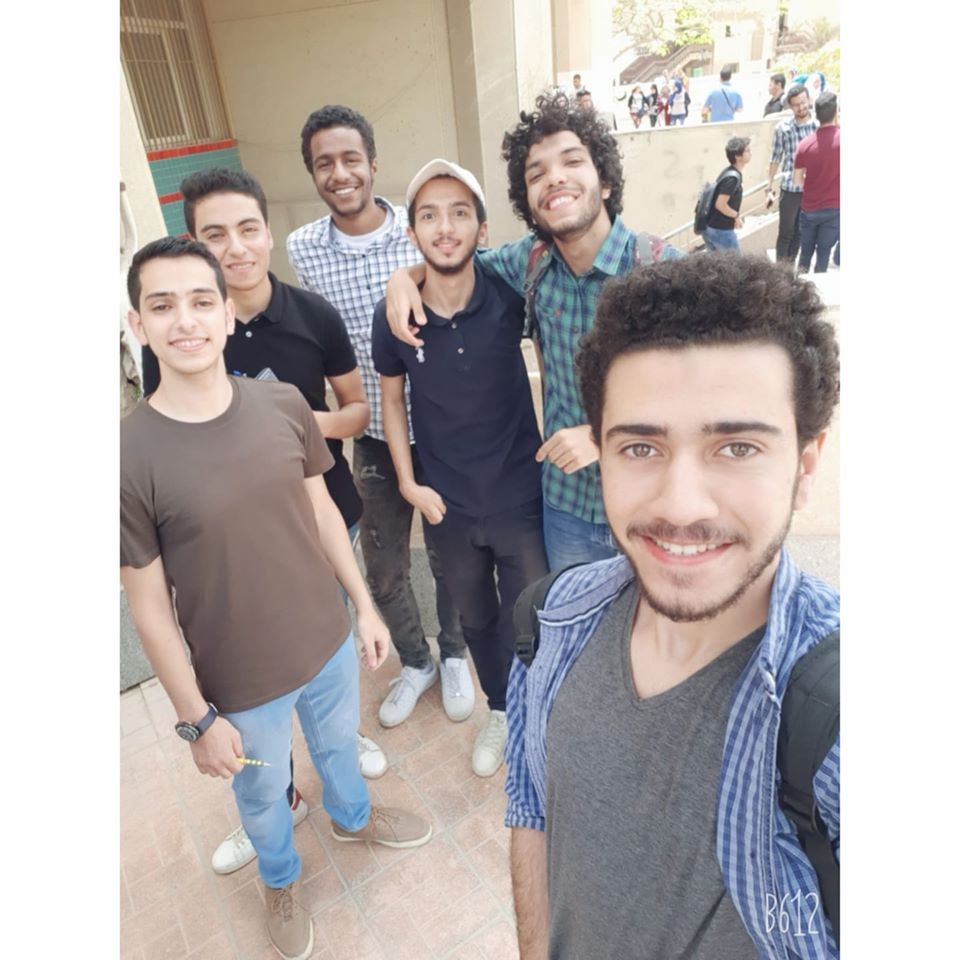

In [ ]:
abdo = cv2.imread('55.jpg')

draw_rectangle(abdo , detect_face(abdo),'abdo')

In [ ]:
# to detect face from webcam 'video'

# cap = cv2.VideoCapture(0)

# while True:
#     ret , frame = cap.read()
#     image = draw_rectangle(frame,detect_face(frame),'abdo')
#     cv2.imshow('abdo',image)
#     k = cv2.waitKey(1)
#     if k == ord('q'):
#         break
        
# cap.release
# cv2.destroyAllWindows()
    

# Have fun with face ' Mask ' 

In [ ]:
# cap = cv2.VideoCapture(0)

# while True:
#     ret,frame = cap.read()
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     face = cv2.CascadeClassifier(xml_classifier)
#     face_rects = face.detectMultiScale(gray,1.3,5)
    
# #     faces = detect_face(frame)
#     for x , y , w ,h  in face_rects :
#         if h>0 and w>0:
#             h,w = int(1.4*h) , int(1.0*w)
#             y = y - 0.1*h
            
#             m = int(y+h)
#             n = int(x+w)
#             frame_roi = frame[y:m , x:n]
#             face_mask_small = cv2.resize(mask_face , (w,h),inetrpolation = cv2.INTER_AREA)
            
#             gray_mask = cv2.cvtColor(face_mask_small,cv2.COLOR_BGR2GRAY)
#             ret, mask = cv2.threshold(gray_mask,180,255,cv2.THRESH_BINARY_INV)
            
#             mask_inv = cv2.bitwise_not(mask)
            
#             masked_face = cv2.bitwise_and(face_mask_small , face_mask_small , mask = mask)
            
#             masked_frame = cv2.bitwise_and(frame_roi,frame_roi,mask = mask_inv)
            
#             frame[y:y+h , x:x+w] = cv2.add(mask_face , masked_frame)
            
#             cv2.imshow('face with mask ' , frame)
            
#             c = cv2.waitKey(1)
#             if k ==ord('q'):
#                 break
 
# cap.release()
# cv2.destroyAllWindows()